In [29]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential

import glob, os, random

In [35]:
base_path = 'C:\\Users\\qdio8\\Desktop\\catdboard_metal_glass'

img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

print(len(img_list))

2521


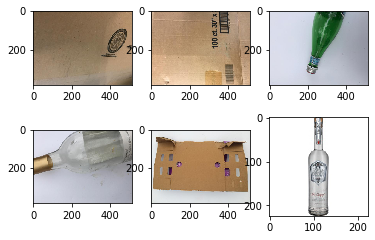

In [36]:
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = load_img(img_path)
    img = img_to_array(img, dtype=np.uint8)

    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [37]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 2615 images belonging to 6 classes.
Found 289 images belonging to 6 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [38]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 37, 37, 32)       

In [52]:
model.fit_generator(train_generator, steps_per_epoch=15, epochs=20, validation_data=validation_generator,validation_steps=5)

Epoch 1/20
15/15 [==============================] - 41s 3s/step - loss: 0.1599 - acc: 0.9458 - val_loss: 2.0806 - val_acc: 0.6500
Epoch 2/20
15/15 [==============================] - 37s 2s/step - loss: 0.2545 - acc: 0.9042 - val_loss: 1.7104 - val_acc: 0.7625
Epoch 3/20
15/15 [==============================] - 33s 2s/step - loss: 0.1831 - acc: 0.9250 - val_loss: 3.0809 - val_acc: 0.6750
Epoch 4/20
15/15 [==============================] - 33s 2s/step - loss: 0.1805 - acc: 0.9125 - val_loss: 1.6077 - val_acc: 0.6615
Epoch 5/20
15/15 [==============================] - 35s 2s/step - loss: 0.1494 - acc: 0.9417 - val_loss: 1.7202 - val_acc: 0.6375
Epoch 6/20
15/15 [==============================] - 36s 2s/step - loss: 0.2389 - acc: 0.8833 - val_loss: 0.2775 - val_acc: 0.7125
Epoch 7/20
15/15 [==============================] - 44s 3s/step - loss: 0.2191 - acc: 0.9083 - val_loss: 2.8938 - val_acc: 0.7000
Epoch 8/20
15/15 [==============================] - 34s 2s/step - loss: 0.1958 - acc: 0.92

In [54]:
print("-- Evaluate --")
scores = model.evaluate_generator(validation_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 75.00%


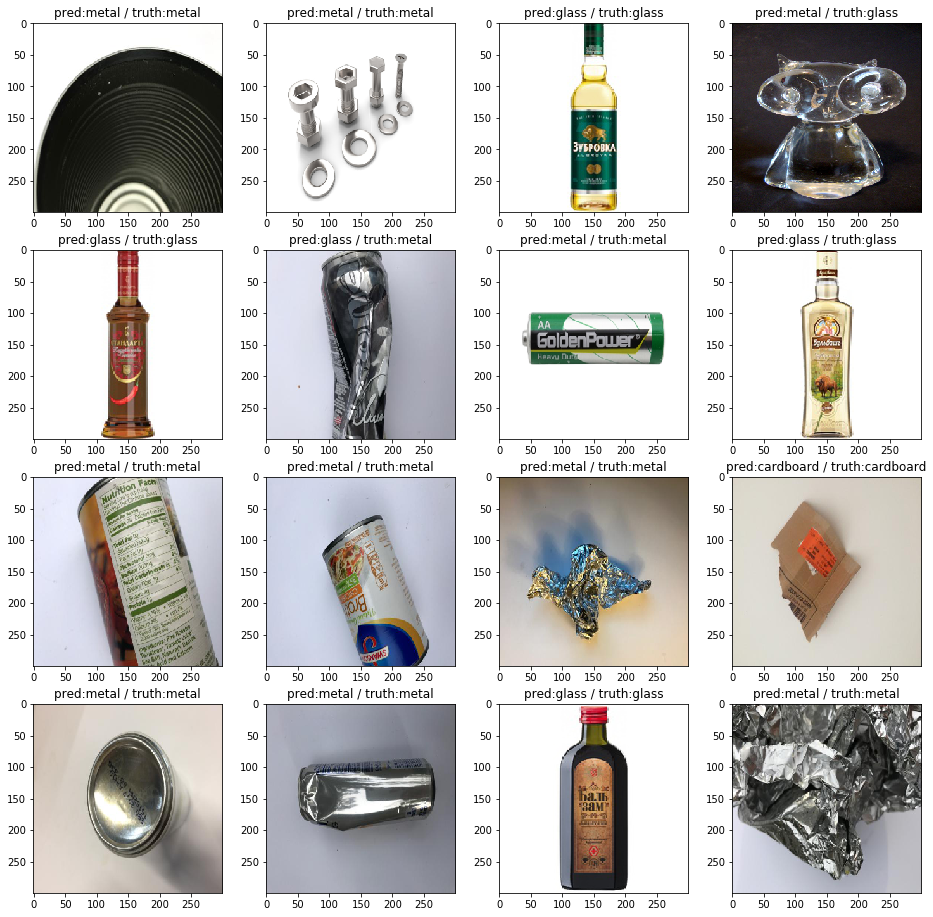

In [55]:
test_x, test_y = validation_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])